<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_HW_05_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 05 – Entrega 04/10/2023
###Prof. Pedro Constantino


---


**Problema 2**

---

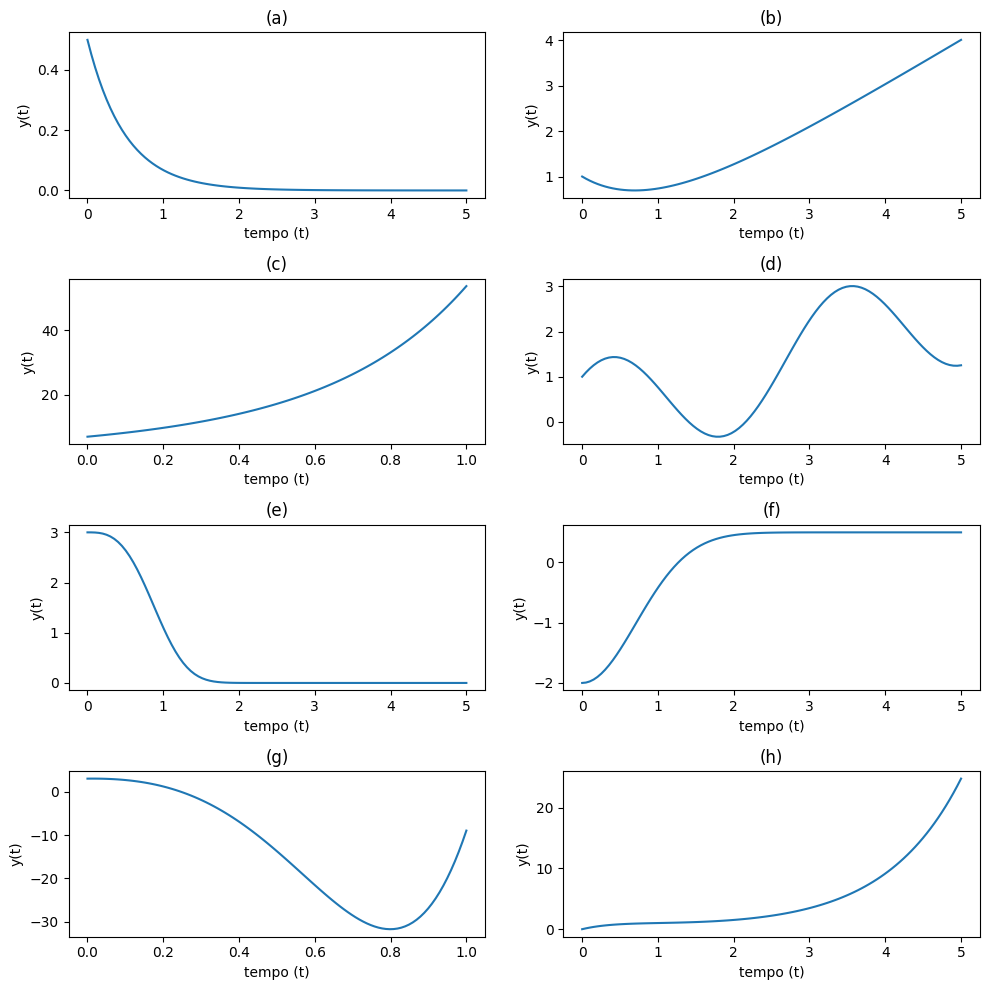

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ya(t):
    out = 0.5*np.exp(-2*t)
    return out

def yb(t):
    out = t-1+2*np.exp(-t)
    return out

def yc(t):
    out = 5*np.exp(t)+2*np.exp(3*t)
    return out

def yd(t):
    out = t/2 + np.cos(2*t)+(3/4)*np.sin(2*t)
    return out

def ye(t):
    out = 3*np.exp(-t**3)
    return out

def yf(t):
    out = 0.5*(1-5*np.exp(-t**2))
    return out

def yg(t):
    out = np.exp(3*t)*(3*np.cos(4*t)-2*np.sin(4*t))
    return out

def yh(t):
    out = (5/2)*np.exp(-t)-(8/3)*np.exp(-2*t)+(1/6)*np.exp(t)
    return out

t = np.linspace(0,5,100)
t2 = np.linspace(0,1,100)

plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
plt.plot(t,ya(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(a)')

plt.subplot(4,2,2)
plt.plot(t,yb(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(b)')

plt.subplot(4,2,3)
plt.plot(t2,yc(t2))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(c)')

plt.subplot(4,2,4)
plt.plot(t,yd(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(d)')

plt.subplot(4,2,5)
plt.plot(t,ye(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(e)')

plt.subplot(4,2,6)
plt.plot(t,yf(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(f)')

plt.subplot(4,2,7)
plt.plot(t2,yg(t2))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(g)')

plt.subplot(4,2,8)
plt.plot(t,yh(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(h)')
plt.tight_layout()
plt.show()


---


**Problema 3a**

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_euler_explicito(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y,x)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        y[i+1] = y[i] + h * getf(x[i], y[i]) # Atualiza o valor de y usando o método de Euler explícito
        x[i+1] = x[i] + h                    # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y

In [ ]:
def metodo_euler_implicito(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos a serem dados
    # h = tamanho do passo
    # Requer a função getR(y,x) e getdR(y,x)

    # Inicializar os vetores de saída para x e y
    x = np.zeros(n)
    y = np.zeros(n)

    # Definir condição iniciais do PVI e tolerância
    x[0] = x0
    y[0] = y0
    tol = 1e-8

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1] (Método de Continuação de Ordem Zero)
        k = 0
        y[i+1] = y[i]
        x[i+1] = x[i] + h

        # Calcular f e df do Método de Euler Implícito no chute inicial de y[i+1]
        R = y[i+1]-y[i]-h*getf(x[i+1], y[i+1])
        dR = 1-h*getdf(x[i+1], y[i+1])

        # Fazer iterações de Newton até convergir y[i+1]
        while abs(R) > tol:
            # Atualizar y[i+1] pelo Método de Newton
            y[i+1] = y[i+1] - R / dR

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1] - y[i] - h*getf(x[i+1], y[i+1])
            dR = 1.0 - h*getdf(x[i+1], y[i+1])

    return x, y

Text(0, 0.5, 'y(t)')

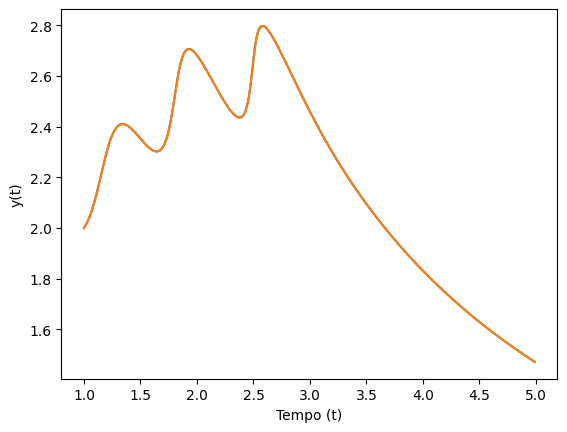

In [ ]:
# Definir a função f(y,t)
def getf(t,y):
    f = t*(y**(-0.5))+t*np.sin(np.pi*y*t)
    return f

t0 = 1.0      # Escolher o instante inicial
y0 = 2.0      # Definir a condição inicial
tf = 5.0      # Definir o instante final
h = 0.01      # Escolher um passo de integração

n = int((tf-t0)/h) # Calcular o número de passos

# Chamar a função do Método de Euler Explícito
t, yexp1 = metodo_euler_explicito(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yexp1)
plt.plot(t,yexp1)
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')

---


**Problema 3b**

---

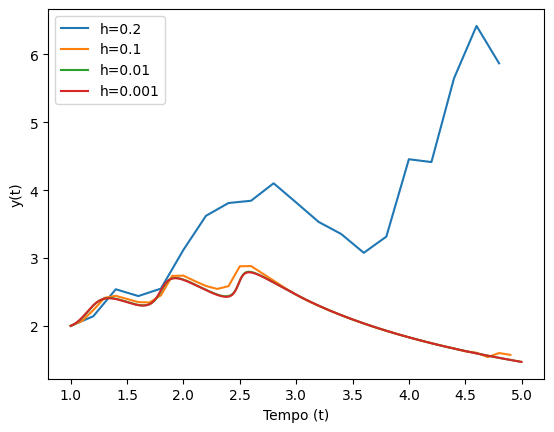

In [ ]:
h1 = 0.2
n1 = int((tf-t0)/h1) # Calcular o número de passos

h2 = 0.1
n2 = int((tf-t0)/h2) # Calcular o número de passos

h3 = 0.01
n3 = int((tf-t0)/h3) # Calcular o número de passos

h4 = 0.0001
n4 = int((tf-t0)/h4) # Calcular o número de passos

# Chamar a função do Método de Euler Explícito
t1, yexp1 = metodo_euler_explicito(t0, y0, n1, h1)
t2, yexp2 = metodo_euler_explicito(t0, y0, n2, h2)
t3, yexp3 = metodo_euler_explicito(t0, y0, n3, h3)
t4, yexp4 = metodo_euler_explicito(t0, y0, n4, h4)

# Plotar os resultados
plt.plot(t1,yexp1)
plt.plot(t2,yexp2)
plt.plot(t3,yexp3)
plt.plot(t4,yexp4)

plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['h=0.2','h=0.1','h=0.01','h=0.001'])

Claramente, a solução é mais instável ou diverge quando o passo de integração $h$ é muito alto.

---


**Problema 3c**

---

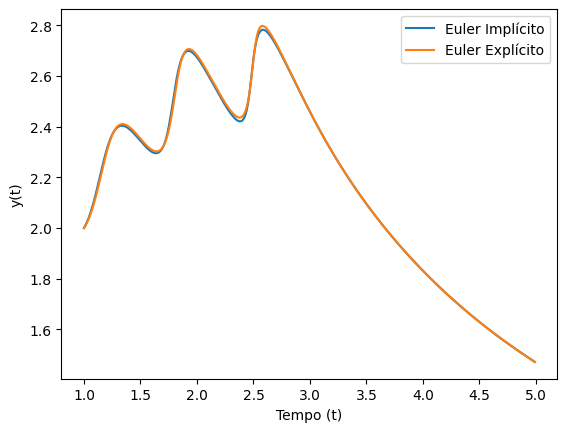

In [ ]:
# Definir a derivada de f(y,t)
def getdf(t,y):
    df = -0.5*t*(y**(-1.5))+np.pi*t*t*np.cos(np.pi*y*t)
    return df

t0 = 1.0      # Escolher o instante inicial
y0 = 2.0      # Definir a condição inicial
tf = 5.0      # Definir o instante final
h = 0.01      # Escolher um passo de integração

n = int((tf-t0)/h) # Calcular o número de passos

# Chamar a função do Método de Euler Explícito
t, yimp = metodo_euler_implicito(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yimp)
plt.plot(t3,yexp3)
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['Euler Implícito','Euler Explícito'])

---


**Problema 4**

---

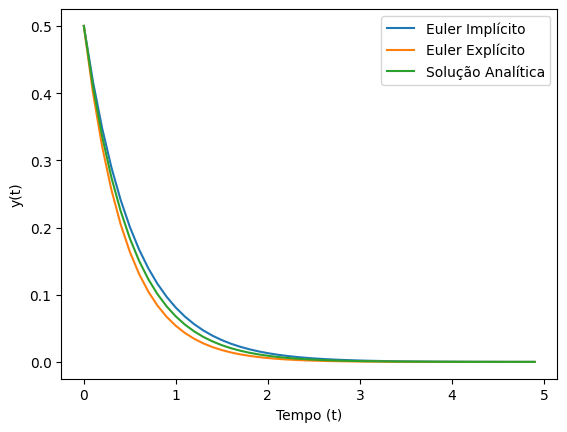

In [ ]:
# Definir a função f(y,t)
def getf(t,y):
    f = -2*y
    return f

# Definir a derivada de f(y,t)
def getdf(t,y):
    df = -2
    return df

t0 = 0.0      # Escolher o instante inicial
y0 = 0.5      # Definir a condição inicial
tf = 5.0      # Escolher o instante final
h = 0.1      # Escolher um passo de integração

n = int((tf-t0)/h) # Calcular o número de passos

t, yexp = metodo_euler_explicito(t0, y0, n, h) # Resolver por Euler Explícito
t, yimp = metodo_euler_implicito(t0, y0, n, h) # Resolver por Euler Implícito

yanal = 0.5*np.exp(-2*t)  #Calcular solução analítica

# Plotar os resultados
plt.plot(t,yimp)    # Euler Implícito
plt.plot(t,yexp)    # Euler Explícito
plt.plot(t,yanal)   # Solução Analítica

plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['Euler Implícito','Euler Explícito','Solução Analítica'])

Euler implícito tende a superestimar a solução, enquanto Euler explícito tende a subestimar a solução. No entanto, essas discrepâncias são minimizadas quanto menor for o valor escolhido para o passo de integração $h$.